In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X = pd.read_csv('linearX.csv')
Y = pd.read_csv('linearY.csv') 
rows,col = X.shape
mean = np.mean(X,axis=0)
std_dev = np.std(X)
X = (X-mean)/std_dev
Ones = np.ones((rows,1))
X = np.append(Ones,X,axis=1)
X.shape

(99, 2)

In [49]:
def cost_fun(theta,X,Y):
    h = np.dot(X,theta)
    y = np.array(Y)
    err_squared = np.square(y-h)
    err_squared_sum = np.sum(err_squared)
    cost_fun_val = (1/(2*rows))*err_squared_sum
    return cost_fun_val


epsilon = 2*1e-11
theta = np.array([[0,0]]).transpose()
cost_plot = []
def lin_reg(learning,X,Y,theta1,epsilon):
    theta_track = theta1
    prev_time = round(time.time()*1000)
    epochs = 0
    itr = 0
    cost_prev = cost_fun(theta1,X,Y)
    cost_plot.append(cost_prev)
    cost_prev+=10
    cost_new = 0
    while True:
        h = np.dot(X,theta1) 
        y = np.array(Y)
        err = (y-h)
        X_trans = X.transpose()
        gradient = (1/rows)*(np.dot(X_trans,err))
        temp= theta1 + (learning*gradient)
        epochs+=1
        cost_new = cost_fun(temp,X,Y)
        if((cost_prev-cost_new)<epsilon): 
            break
        else:
            theta1 = temp
            cost_prev = cost_new
            curr_time = round(time.time()*1000)
            if(curr_time-prev_time == 2):
                itr+=1
                theta_track = np.c_[theta_track,theta1]
                cost_plot.append(cost_new)
                prev_time = curr_time
    print("Total Iterations/epochs = ",epochs)
    #print("Time diff = ",itr)
    return theta1,theta_track
    
    

theta_final_1,theta_track_1 = lin_reg(0.004,X,Y,theta,epsilon)
print("Final Theta= ",theta_final_1)

Total Iterations/epochs =  2385
Final Theta=  [[0.99656354]
 [0.00135784]]


In [50]:
after_gd = cost_fun(theta,X,Y)
print("Cost function value at updated theta = ",after_gd)
def my_pred():
    x = float(input("Enter the value of acidity in wine: "))
    x = float((x-mean)/std_dev)
    test = np.array([1,x])
    predicted_val= np.dot(test,theta_final_1)
    print("The density of wine = ",predicted_val)
    
#my_pred()

Cost function value at updated theta =  0.4966419100505051


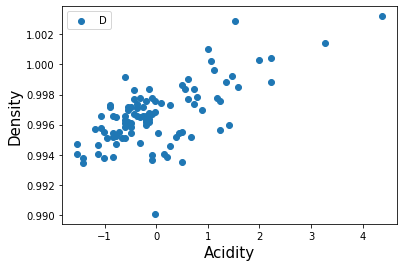

In [51]:
h = np.dot(X,theta_final_1)

#h = np.array(theta_0+theta_1*x_values)

plt.scatter(X[:,1],Y)

plt.xlabel("Acidity",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.legend("Density of Wine with respect to Acidity")
plt.show()

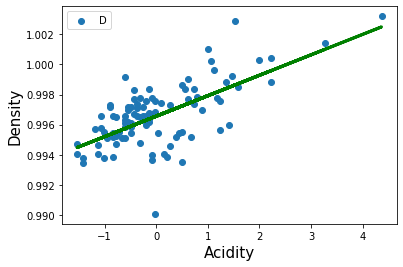

In [52]:
plt.scatter(X[:,1],Y)

plt.xlabel("Acidity",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.legend("Density of Wine with respect to Acidity")
plt.plot(X[:,1],h, color='green', linewidth = 3,label="hypothesis")
plt.show()

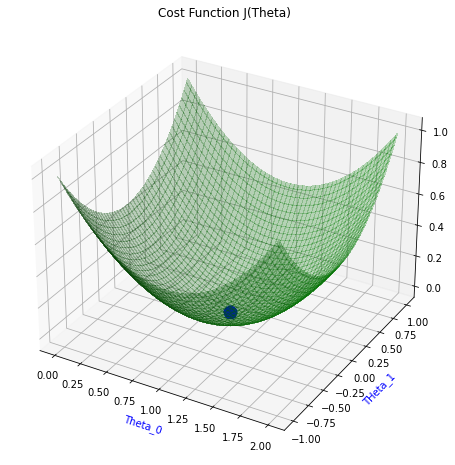

In [53]:

figure, axis = plt.subplots(figsize=(12,8),subplot_kw={'projection':'3d'})
x_pts = np.linspace(0,2,100)
y_pts = np.linspace(-1,1,100)
z = []

for i in x_pts:
    for j in y_pts:
        temp = cost_fun(np.array([[i,j]]).transpose(),X,Y)
        z.append(temp)

z=np.array(z)
q_arr = z
x_ax, y_ax = np.meshgrid(x_pts,y_pts)
z = z.reshape((x_ax.shape[0],y_ax.shape[0]))



axis.scatter(theta_final_1[0][0], theta_final_1[1][0], linewidth = 10 , marker='*',color='blue')
    
surface = axis.plot_surface(x_ax,y_ax,z,color='green',
                       linewidth=0,antialiased=False,alpha = 0.25)
   
    
axis.set_title('Cost Function J(Theta)')
axis.set_xlabel('Theta_0',color='blue')
axis.set_ylabel('THeta_1',color='blue')
  
plt.show()

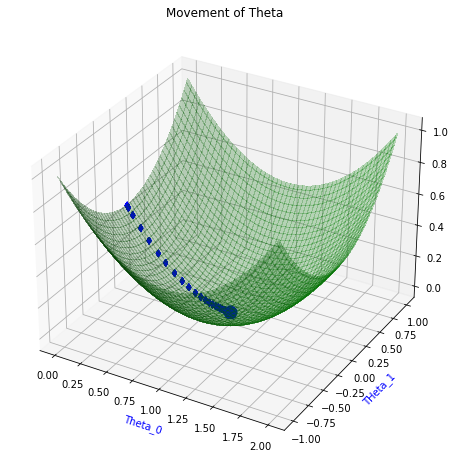

In [61]:
figure, axis = plt.subplots(figsize=(12,8),subplot_kw={'projection':'3d'})
surface = axis.plot_surface(x_ax,y_ax,z,color='green',
                       linewidth=0,antialiased=False,alpha = 0.25)
theta_row,theta_col = theta_track_1.shape
theta_x = theta_track_1[0,:]
theta_y = theta_track_1[1,:]
cp = np.array(cost_plot)


# for j in range(theta_col):
#     cost_sc = cost_fun(theta_x[j],theta_y[j],X,Y)

axis.scatter(theta_final_1[0][0], theta_final_1[1][0], linewidth = 10 , marker='*',color='blue') 

for i in range(theta_col):
    axis.scatter3D(theta_x,theta_y,cp, color = "blue",marker="d")
    #axis.plot3D(theta_x,theta_y,cp,color="red")
    #axis.scatter(theta_x,theta_y)

    
axis.set_title('Movement of Theta')
axis.set_xlabel('Theta_0',color='blue')
axis.set_ylabel('THeta_1',color='blue')
plt.show()

Total Iterations/epochs =  2385


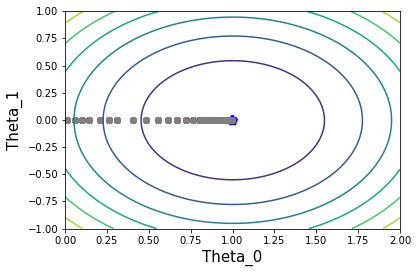

In [99]:
def plot_contours(theta_f,theta_track):
    theta_row,theta_col = theta_track.shape
    theta_x = theta_track[0,:]
    theta_y = theta_track[1,:]
    plt.contour(x_pts,y_pts,z)
    plt.scatter(theta_f[0][0], theta_f[1][0], linewidth = 5 , marker='*',color='blue')
    for i in range(theta_col):
        plt.scatter(theta_x, theta_y)
    plt.xlabel("Theta_0",fontsize=15)
    plt.ylabel("Theta_1",fontsize=15)
    plt.show()
theta_final_1,theta_track_1 = lin_reg(0.004,X,Y,theta,epsilon)    
plot_contours(theta_final_1,theta_track_1) 

Total Iterations/epochs =  8857


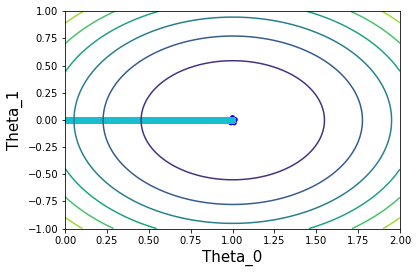

In [96]:
learning_1 = 0.001

theta_final_2,theta_track_2 = lin_reg(learning_1,X,Y,theta,epsilon)
plot_contours(theta_final_2,theta_track_2)



Total Iterations/epochs =  415


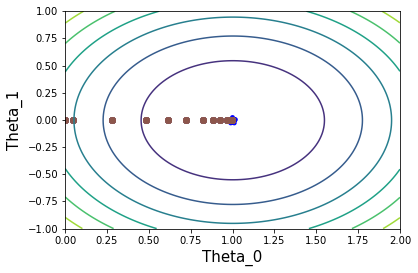

In [97]:
learning_2 = 0.025

theta_final_3,theta_track_3 = lin_reg(learning_2,X,Y,theta,epsilon)
plot_contours(theta_final_3,theta_track_3)

Total Iterations/epochs =  107


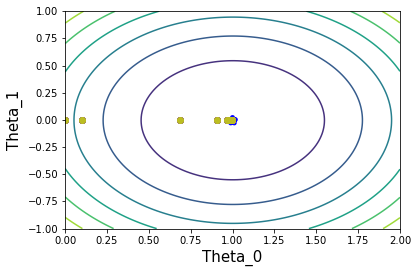

In [98]:
learning_3 = 0.1
theta_final_4,theta_track_4 = lin_reg(learning_3,X,Y,theta,epsilon)
plot_contours(theta_final_4,theta_track_4)

Total Iterations/epochs =  53


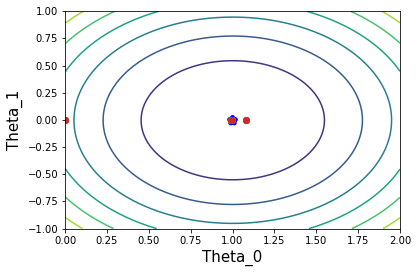

In [103]:
# theta_final_4,theta_track_4 = lin_reg(1.8,X,Y,theta,epsilon)
# plot_contours(theta_final_4,theta_track_4)